In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv("/content/training.csv")
test = pd.read_csv("/content/test.csv")
val = pd.read_csv("/content/validation.csv")


In [3]:
new_train = train[train["label"] != 5]
new_test = test[test["label"] != 5]
new_val = val[val["label"] != 5]


In [4]:
new_train = pd.concat([new_train, new_val], axis=0)

In [5]:
new_train.shape

(17347, 2)

In [6]:
new_train.sample(5)

,text,label
13485,i like to throw in a habanero if i m feeling b...,1
10704,i already can imagine and feel so excited if i...,1
7917,i feel uncontrollably agitated and i have no i...,4
13379,i feel like this is another one of those dress...,1
8950,i dunno where that feeling came from and im no...,1


In [7]:
new_train.isnull().sum()

,0
text,0
label,0


In [8]:
new_train.describe()

,label
count,17347.000000
mean,1.437021
std,1.368005
min,0.000000
25%,0.000000
50%,1.000000
75%,3.000000
max,4.000000


# 2.EDA

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#new_train = new_train.sample(n=5000)

In [11]:
df = new_train.copy()

In [12]:
df["label"].value_counts()

,count
label,
1,6066
0,5216
3,2434
4,2149
2,1482


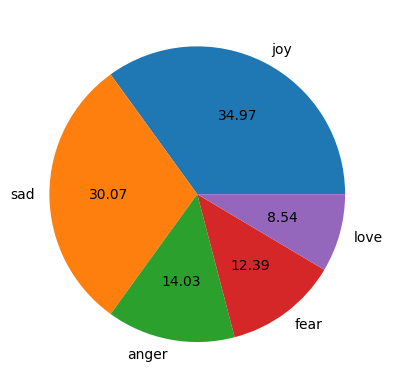

In [13]:
plt.pie(df["label"].value_counts(),labels=['joy','sad','anger','fear','love'],autopct="%0.2f")
plt.show()

In [14]:
!pip install nltk

In [15]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
df['text_alpa_counts'] = df["text"].apply(len)

In [17]:
df["text_alpa_words"] = df["text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [18]:
df["text_alpa_sent"] = df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [19]:
df.describe()

,label,text_alpa_counts,text_alpa_words,text_alpa_sent
count,17347.000000,17347.000000,17347.000000,17347.0
mean,1.437021,96.545627,19.120309,1.0
std,1.368005,55.750921,10.973564,0.0
min,0.000000,7.000000,2.000000,1.0
25%,0.000000,53.000000,11.000000,1.0
50%,1.000000,86.000000,17.000000,1.0
75%,3.000000,129.000000,25.000000,1.0
max,4.000000,300.000000,66.000000,1.0


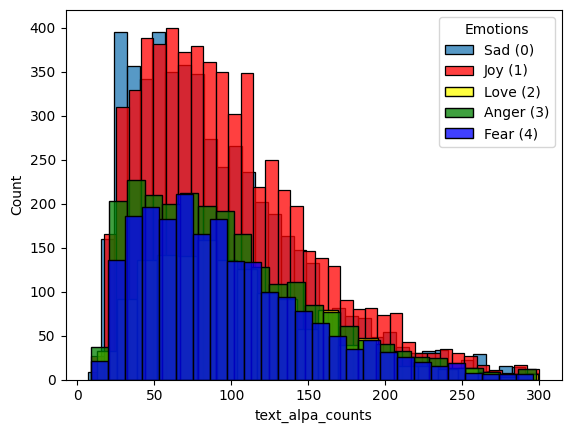

In [20]:

# Plotting histograms with labels for the legend
sns.histplot(df[df["label"] == 0]["text_alpa_counts"], label="Sad (0)", legend=True)
sns.histplot(df[df["label"] == 1]["text_alpa_counts"], label="Joy (1)", color='red', legend=True)
sns.histplot(df[df["label"] == 2]["text_alpa_counts"], label="Love (2)", color='yellow', legend=True)
sns.histplot(df[df["label"] == 3]["text_alpa_counts"], label="Anger (3)", color='green', legend=True)
sns.histplot(df[df["label"] == 4]["text_alpa_counts"], label="Fear (4)", color='blue', legend=True)

# Show legend
plt.legend(title="Emotions")

# Show the plot
plt.show()


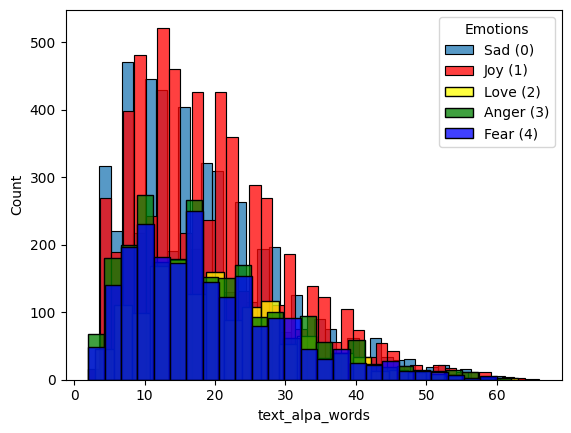

In [21]:

# Plotting histograms with labels for the legend
sns.histplot(df[df["label"] == 0]["text_alpa_words"], label="Sad (0)", legend=True)
sns.histplot(df[df["label"] == 1]["text_alpa_words"], label="Joy (1)", color='red', legend=True)
sns.histplot(df[df["label"] == 2]["text_alpa_words"], label="Love (2)", color='yellow', legend=True)
sns.histplot(df[df["label"] == 3]["text_alpa_words"], label="Anger (3)", color='green', legend=True)
sns.histplot(df[df["label"] == 4]["text_alpa_words"], label="Fear (4)", color='blue', legend=True)

# Show legend
plt.legend(title="Emotions")

# Show the plot
plt.show()

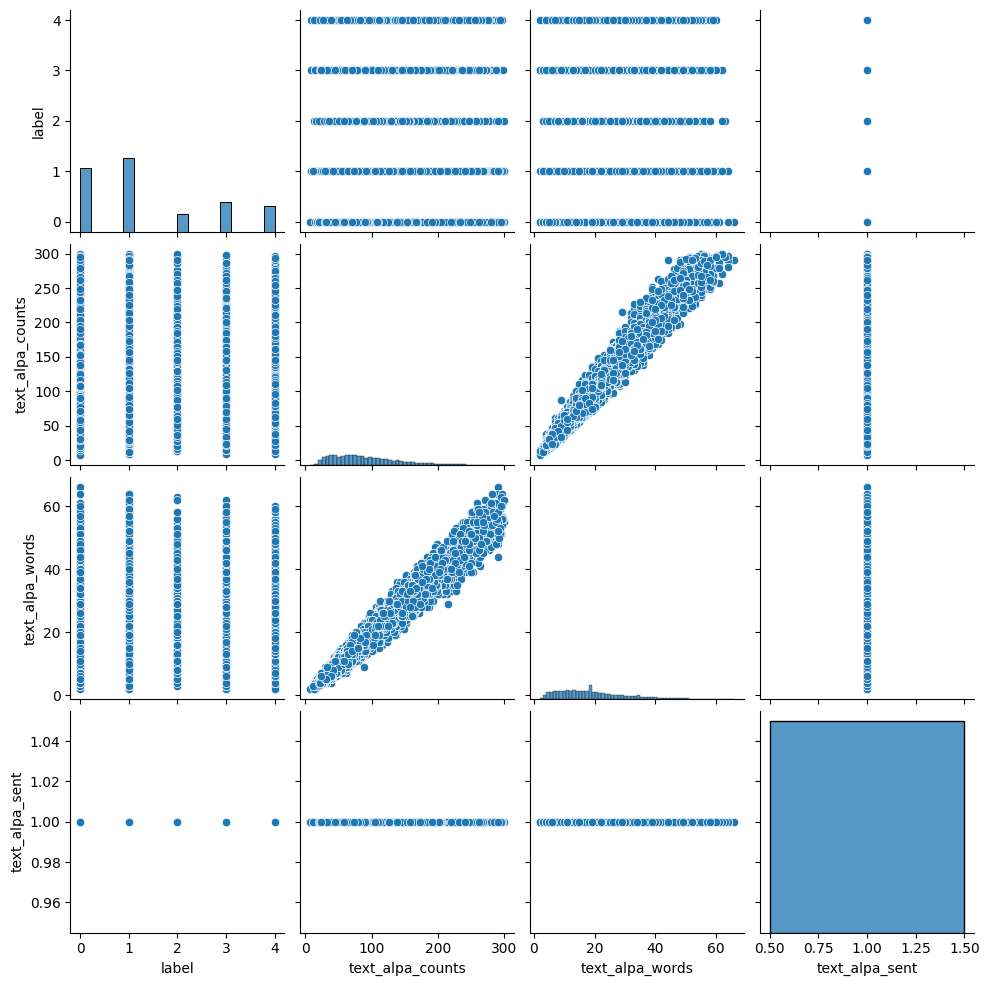

In [22]:
sns.pairplot(df)
plt.show()

In [23]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df.corr()

,label,text_alpa_counts,text_alpa_words,text_alpa_sent
label,1.000000,0.022975,0.019186,NaN
text_alpa_counts,0.022975,1.000000,0.983820,NaN
text_alpa_words,0.019186,0.983820,1.000000,NaN
text_alpa_sent,NaN,NaN,NaN,NaN


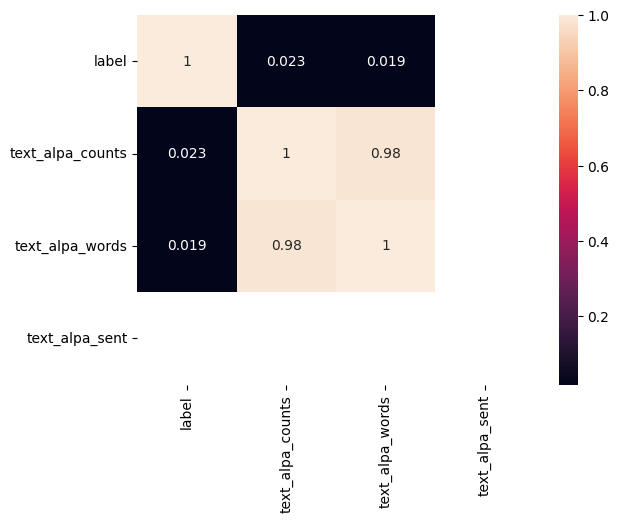

In [24]:
sns.heatmap(numeric_df.corr(),annot=True)
plt.show()

## 3. Preprocessing

1. **Lowercase**
   - Convert all text to lowercase to maintain consistency.

2. **Tokenization**
   - Split text into individual words or tokens.

3. **Removing Special Characters**
   - Eliminate special characters that do not contribute to the meaning of the text.

4. **Removing Stop Words and Punctuation**
   - Remove common words (like "and", "the") and punctuation that do not add significant meaning.

5. **Lemitization**
   - Reduce words to their root form (e.g., "running" becomes "run") to unify similar words.


In [25]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [26]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer(language='english')




In [27]:
from nltk.corpus import stopwords
import string
punn = string.punctuation
stk = stopwords.words('english')

In [28]:
# Preprocessed Function
def Clean_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []

    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stk and i not in punn:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:

        y.append(stemmer.stem(i))

    return " ".join(y)

In [29]:
df["Transformed_text"] = df["text"].apply(Clean_text)

In [30]:
# Now creating wordcloud
from wordcloud import WordCloud
ws = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [31]:
sad = ws.generate(df[df["label"] == 0]["Transformed_text"].str.cat(sep=" "))


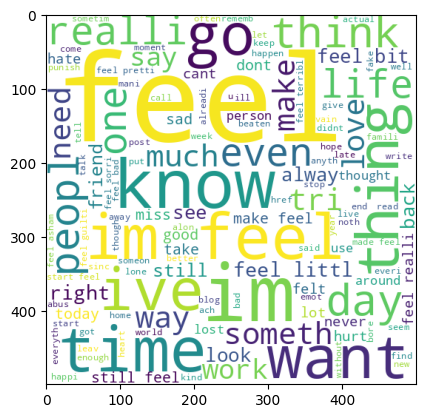

In [32]:
plt.imshow(sad)

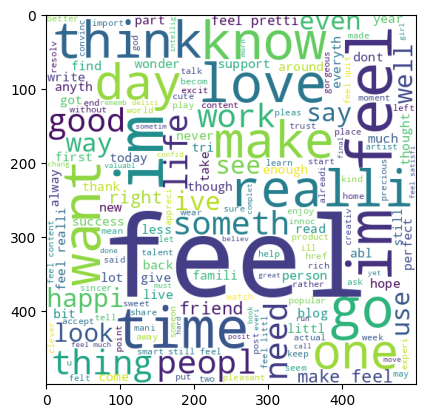

In [33]:
joy = ws.generate(df[df["label"] == 1]["Transformed_text"].str.cat(sep=" "))
plt.imshow(joy)

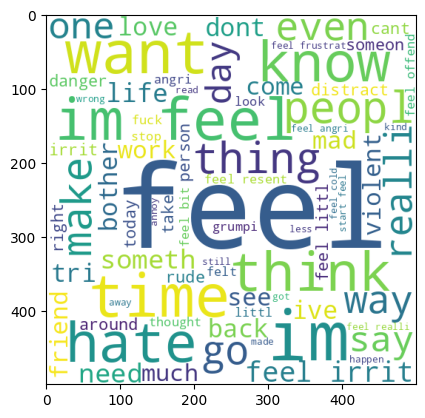

In [34]:
anger = ws.generate(df[df["label"] == 3]["Transformed_text"].str.cat(sep=" "))
plt.imshow(anger)

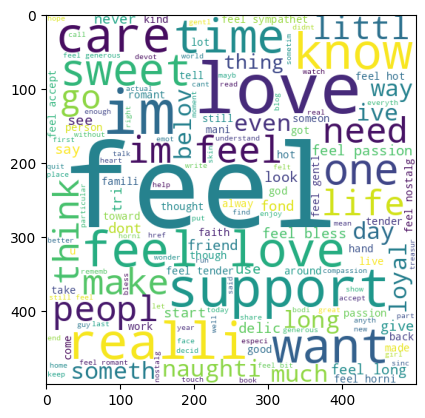

In [35]:
love = ws.generate(df[df["label"] == 2]["Transformed_text"].str.cat(sep=" "))
plt.imshow(love)

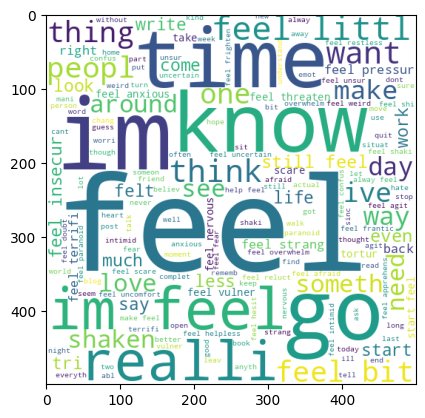

In [36]:
fear = ws.generate(df[df["label"] == 4]["Transformed_text"].str.cat(sep=" "))
plt.imshow(fear)

In [37]:
#now extract top 30 words used in sentences
Sad_ = []
for i in df[df["label"] == 0]["Transformed_text"].tolist():
    for words in i.split():
        Sad_.append(words)

In [38]:
from collections import Counter
Counts = pd.DataFrame(Counter(Sad_).most_common(30))

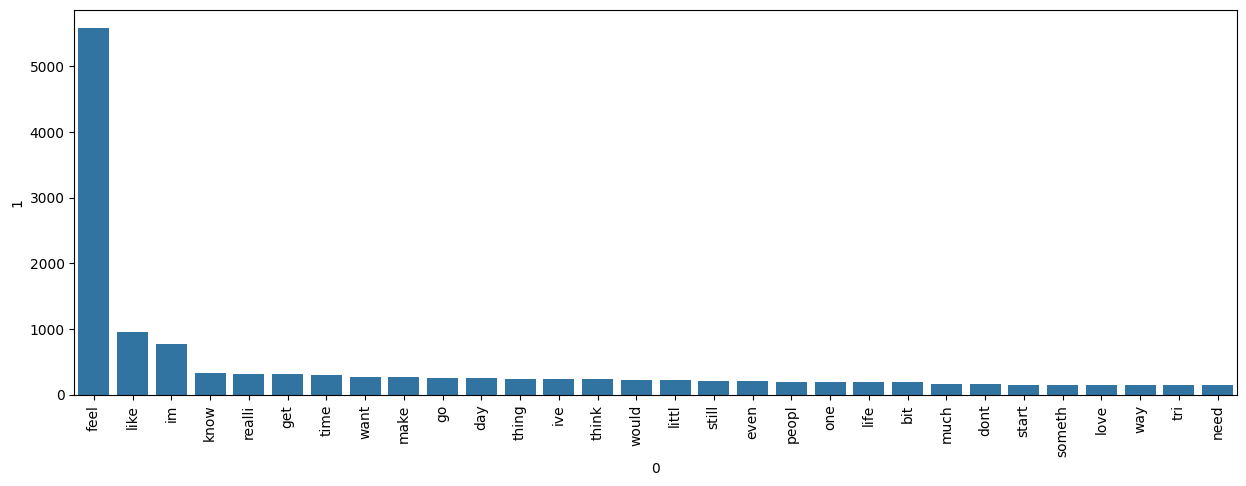

In [39]:
plt.figure(figsize=(15,5))
sns.barplot(x=Counts[0],y=Counts[1])
plt.xticks(rotation='vertical')
plt.show()

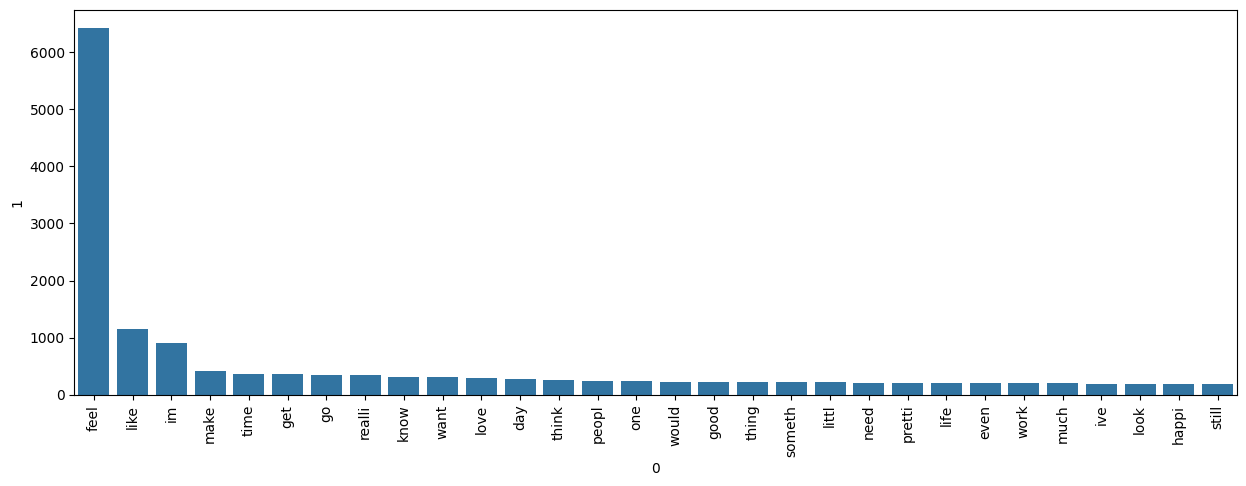

In [40]:
Joy_ = []
for i in df[df["label"] == 1]["Transformed_text"].tolist():
    for words in i.split():
        Joy_.append(words)


Counts_joy = pd.DataFrame(Counter(Joy_).most_common(30))

plt.figure(figsize=(15,5))
sns.barplot(x=Counts_joy[0],y=Counts_joy[1])
plt.xticks(rotation='vertical')
plt.show()

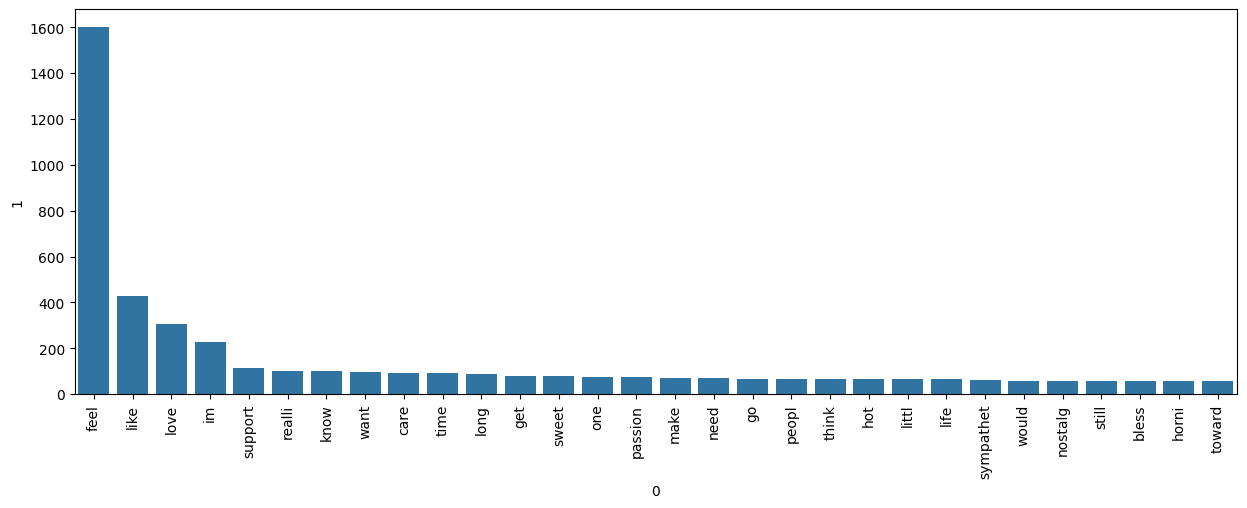

In [41]:
Love_ = []
for i in df[df["label"] == 2]["Transformed_text"].tolist():
    for words in i.split():
        Love_.append(words)


Counts_Love = pd.DataFrame(Counter(Love_).most_common(30))

plt.figure(figsize=(15,5))
sns.barplot(x=Counts_Love[0],y=Counts_Love[1])
plt.xticks(rotation='vertical')
plt.show()

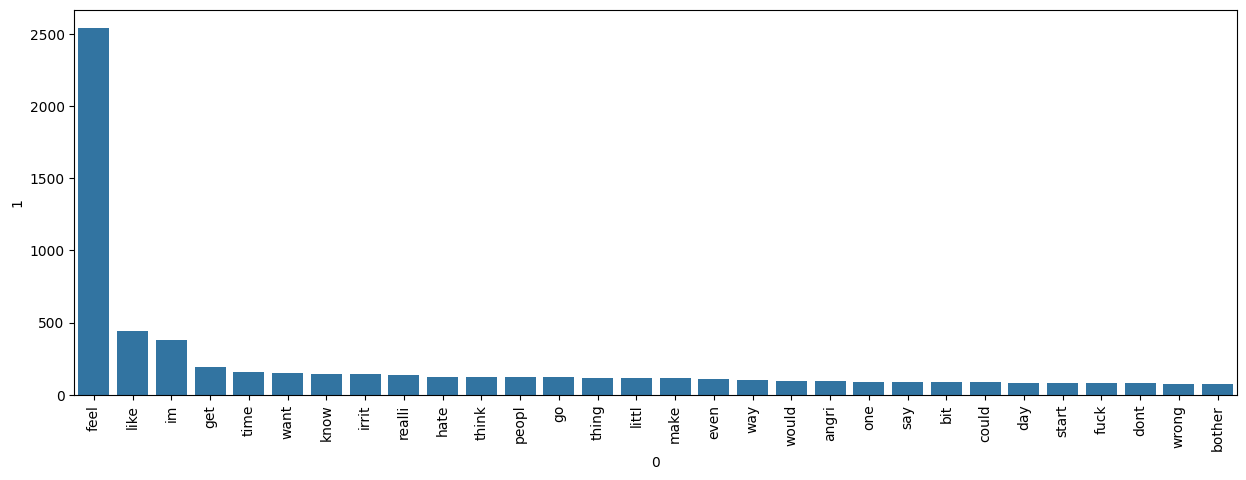

In [42]:
Anger_ = []
for i in df[df["label"] == 3]["Transformed_text"].tolist():
    for words in i.split():
        Anger_.append(words)


Counts_Anger = pd.DataFrame(Counter(Anger_).most_common(30))

plt.figure(figsize=(15,5))
sns.barplot(x=Counts_Anger[0],y=Counts_Anger[1])
plt.xticks(rotation='vertical')
plt.show()

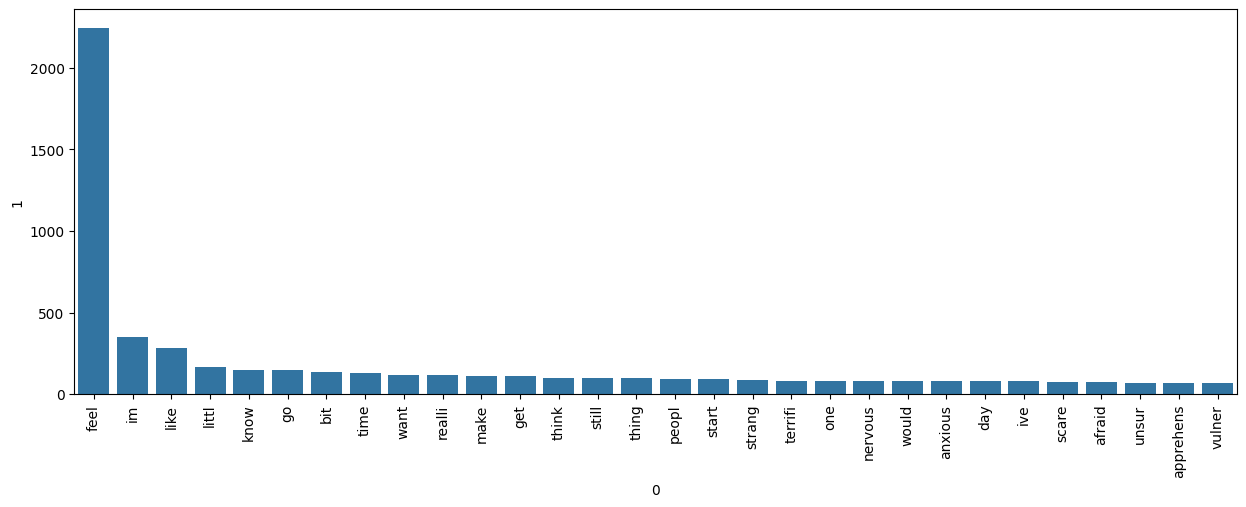

In [43]:
Fear_ = []
for i in df[df["label"] == 4]["Transformed_text"].tolist():
    for words in i.split():
        Fear_.append(words)


Counts_Fear = pd.DataFrame(Counter(Fear_).most_common(30))

plt.figure(figsize=(15,5))
sns.barplot(x=Counts_Fear[0],y=Counts_Fear[1])
plt.xticks(rotation='vertical')
plt.show()

# 4.Model Building

In [44]:
#test = test.sample(n=500)

In [115]:
df.shape

(17347, 6)

In [126]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features=3000)

x_train1 = tf.fit_transform(df["Transformed_text"]).toarray()
x_test1 = tf.transform(test["Transformed_text"]).toarray()

In [127]:
y_train = df["label"].values
y_test = test["label"].values

In [128]:
from sklearn.preprocessing import MinMaxScaler

In [129]:
scalar = MinMaxScaler()
x_train1 = scalar.fit_transform(x_train1)
x_test1 = scalar.transform(x_test1)


In [130]:

from sklearn.ensemble import ExtraTreesClassifier

Extratree = ExtraTreesClassifier()


In [103]:
#multi_class{‘auto’, ‘ovr’, ‘multinomial’}

In [131]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [132]:
Extratree.fit(x_train1,y_train)

ExtraTreesClassifier()

In [133]:
y_pred2 = Extratree.predict(x_test1)

In [134]:
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2,average="weighted"))

0.8505
[[532  14   4  19  12   0]
 [ 18 631  28   9   9   0]
 [ 10  47  96   2   4   0]
 [ 12   9   3 239  12   0]
 [ 14   0   0   7 203   0]
 [  4  37   1   3  21   0]]
0.8217756128339901


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [135]:
import pickle

In [138]:
import pickle
import os
from google.colab import files
import shutil

# Function to split the model into smaller parts
def split_model(model, folder, max_size=25):
    if not os.path.exists(folder):
        os.makedirs(folder)

    data = pickle.dumps(model)
    size = len(data)

    parts = []
    part_size = max_size * 1024 * 1024  # Convert MB to bytes

    for i in range(0, size, part_size):
        part = data[i:i+part_size]
        parts.append(part)
        with open(f'{folder}/part_{len(parts)}.pkl', 'wb') as f:
            f.write(part)

    print(f'Model split into {len(parts)} parts.')

# Load your model
with open('random_forest.pkl', 'rb') as f:
    Extratree = pickle.load(f)

# Split the model
split_model(Extratree, 'model_parts', max_size=25)

shutil.make_archive('model_parts', 'zip', 'model_parts')

# Download the zip file
files.download('model_parts.zip')


Model split into 7 parts.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>